In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import matplotlib 

from scipy.constants import physical_constants
mc2 = physical_constants['electron mass energy equivalent in MeV'][0]*1e6  # m_e c^2 in [eV] 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from distgen.generator import Generator

from gpt import GPT
from gpt.gpt_distgen import run_gpt_with_distgen
from gpt.gpt_distgen import phase_gpt_with_distgen

from pmd_beamphysics import single_particle

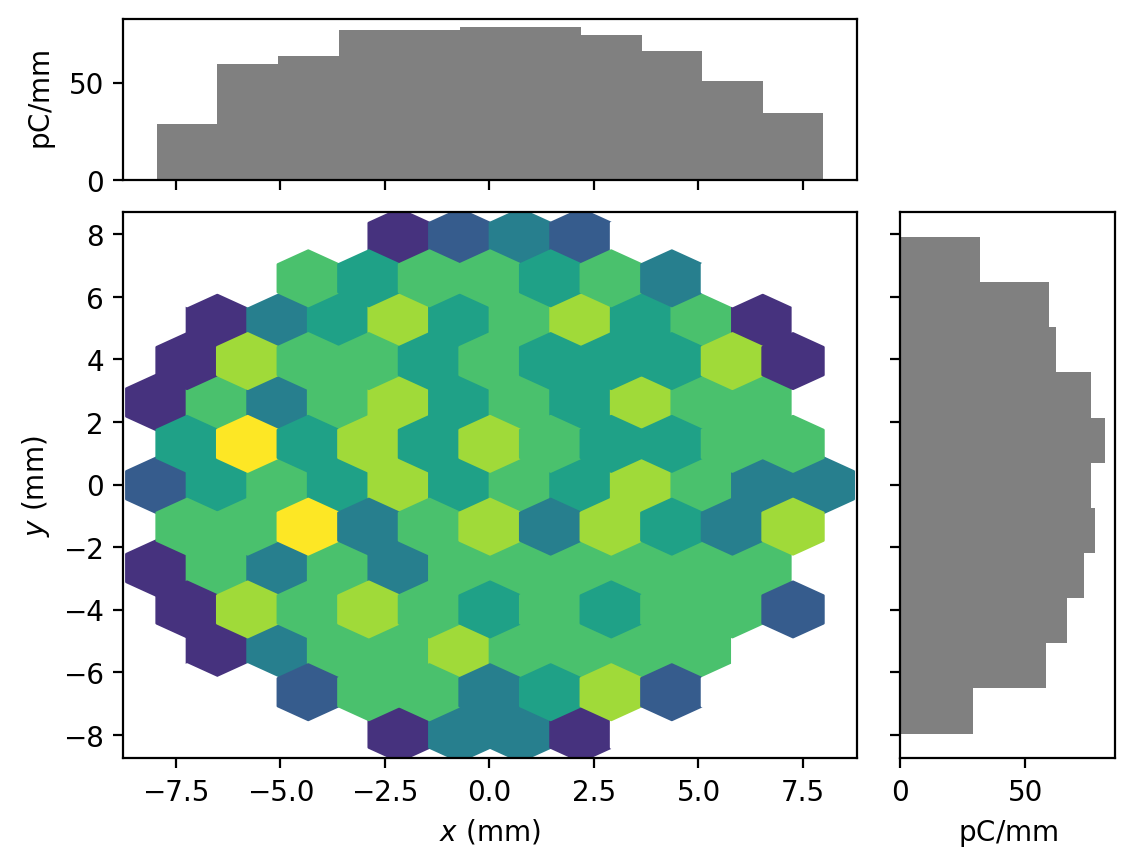

In [3]:
gen = Generator('templates/cu_injector/distgen.in.yaml')
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
pg = gen.particles

In [4]:
centroid = single_particle(x =pg['mean_x'], y =pg['mean_y'],  z=pg['mean_z'],
                           px=pg['mean_x'], py=pg['mean_y'], pz=pg['mean_pz'], t = pg['mean_t'])

centroid['p']/mc2 - 0.00043286905408703526

#0.00043286905408703526

array([0.])

In [5]:
settings={
          'Ntout':500,
          'gun_voltage':400,
          'buncher_voltage':50,
          'phiCTB01_off':-90, 
          'cavity_1_voltage':1000,
          'cavity_2_voltage':1000,
          'cavity_3_voltage':1000,
          'cavity_4_voltage':1000,
          'cavity_5_voltage':1000,
          'A3Quad_1_current':3,
          'A3Quad_2_current':-3,
          'A3Quad_3_current':3
         }

In [6]:
G = GPT('templates/cu_injector/gpt.in', initial_particles=centroid, verbose=True)
G.set_variables(settings);

ValueError: invalid literal for int() with base 10: 'cos(THXSLA01)'

In [ ]:
G.auto_phase()

In [ ]:
# Down sample particles for speed
gen['n_particle']=500
gen.run()
gen.particles.plot('x', 'y')
G.initial_particles = gen.particles

In [ ]:
G.run()

In [ ]:
settings['n_particle']=500

G2 = run_gpt_with_distgen(settings,
                          gpt_input_file='templates/cu_injector/gpt.in',
                          distgen_input_file='templates/cu_injector/distgen.in.yaml',
                          verbose=True,
                          auto_phase=True,)
                          #workdir='templates/cu_injector/temp',
                          #use_tempdir=False)

In [ ]:
settings['n_particle']=500

G3, phase_settings = phase_gpt_with_distgen(settings,
                                            gpt_input_file='templates/cu_injector/gpt.in',
                                            distgen_input_file='templates/cu_injector/distgen.in.yaml',
                                            verbose=True,)
                                            #workdir='templates/cu_injector/temp',
                                            #use_tempdir=False)
                                            

In [ ]:
phase_settings

In [ ]:
G3.run()

In [ ]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('mean_kinetic_energy')[:-10]/1e6);
plt.xlabel('z (m)');
plt.ylabel('KE (MeV)');

#(G2.tout_stat('mean_kinetic_energy')[-10] - G3.tout_stat('mean_kinetic_energy')[-10])/G2.tout_stat('mean_kinetic_energy')[-10]

In [ ]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_x')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_x')[:-10]*1e3);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('sigma_x')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel('$\sigma_x$ (mm)');

In [ ]:
phases = ['phiCTB01_0', 'phiCTC01_0', 'phiCTC02_0', 'phiCTC03_0', 'phiCTC04_0', 'phiCTC05_0']

for p in phases:
    print(G.input['variables'][p] - G2.input['variables'][p])

In [ ]:
plt.plot(G.tout_stat('mean_z')[:-10], G.tout_stat('sigma_z')[:-10]*1e3);
plt.plot(G2.tout_stat('mean_z')[:-10], G2.tout_stat('sigma_z')[:-10]*1e3);
plt.plot(G3.tout_stat('mean_z')[:-10], G3.tout_stat('sigma_z')[:-10]*1e3);
plt.xlabel('z (m)');
plt.ylabel('$\sigma_z$ (mm)');